In [1]:
import shutil
import os
import numpy as np
import argparse

In [2]:
import random
import keras

In [3]:
from tensorflow.keras import Sequential


In [4]:
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\DELL\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
path_test="C:\\Dataset"

In [6]:
Categories=["bareland","riceshoot"]

In [7]:
IMG_SIZE=48

In [8]:
training=[]
def createTrainingData():
    for cat in Categories:
        path=os.path.join(path_test,cat)
        class_num=Categories.index(cat)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            #new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training.append([img_array,class_num])



In [9]:
createTrainingData()


In [10]:
random.shuffle(training)
training=training[:7000]

In [11]:
X=[]
Y=[]
for features,label in training:
    X.append(features)
    Y.append(label)
X=np.array(X).reshape(-1,48,48,3)

In [12]:
print(X)
print(shape(X))

[[[[138 154 156]
   [ 91 108 112]
   [ 75  88  96]
   ...
   [ 60  89  92]
   [ 61  97  96]
   [ 67 106 110]]

  [[108 129 135]
   [ 89 109 112]
   [ 98 116 119]
   ...
   [ 42  70  74]
   [ 30  68  67]
   [ 47  86  89]]

  [[ 89 102 107]
   [ 91 105 111]
   [106 126 132]
   ...
   [ 56  82  85]
   [ 46  83  83]
   [ 70 103 108]]

  ...

  [[ 96 116 125]
   [ 99 121 127]
   [103 130 137]
   ...
   [ 99 120 126]
   [ 82 100 108]
   [ 80  96 105]]

  [[ 92 113 118]
   [ 93 114 124]
   [ 95 123 127]
   ...
   [104 123 129]
   [ 90 114 118]
   [ 86 104 112]]

  [[ 86 111 113]
   [ 96 117 122]
   [110 136 145]
   ...
   [109 126 135]
   [103 124 133]
   [ 92 111 117]]]


 [[[128 140 146]
   [127 140 145]
   [130 141 148]
   ...
   [130 145 148]
   [130 145 147]
   [131 144 146]]

  [[129 142 145]
   [124 139 144]
   [124 139 144]
   ...
   [131 142 145]
   [131 143 146]
   [133 145 147]]

  [[124 138 141]
   [123 138 141]
   [121 136 141]
   ...
   [130 140 142]
   [130 141 143]
   [130 143

In [13]:
from keras.utils import np_utils
y=np_utils.to_categorical(Y,2)

In [14]:
shape(Y)
Y=np.array(Y)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [16]:
batch_size = 128
nb_classes =2
nb_epochs = 20
img_rows, img_columns = 48, 48
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(48, 48, 3)),
    tf.keras.layers.Conv2D(6,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((3, 3), strides=3),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((4, 4), strides=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2,  activation=tf.nn.softmax)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         168       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 6)         330       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        880       
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                    

In [19]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
44/44 [==============================] - 7s 147ms/step - loss: 0.4052 - accuracy: 0.8952 - val_loss: 0.0360 - val_accuracy: 0.9893
Epoch 2/10
44/44 [==============================] - 6s 132ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 0.0127 - val_accuracy: 0.9957
Epoch 3/10
44/44 [==============================] - 6s 132ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0102 - val_accuracy: 0.9950
Epoch 4/10
44/44 [==============================] - 6s 132ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0106 - val_accuracy: 0.9971
Epoch 5/10
44/44 [==============================] - 6s 140ms/step - loss: 0.0190 - accuracy: 0.9930 - val_loss: 0.0059 - val_accuracy: 0.9971
Epoch 6/10
44/44 [==============================] - 6s 141ms/step - loss: 0.0086 - accuracy: 0.9966 - val_loss: 0.0133 - val_accuracy: 0.9950
Epoch 7/10
44/44 [==============================] - 6s 143ms/step - loss: 0.0050 - accuracy: 0.9979 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 

### METRICS

In [21]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.0030108250211924314
Test accuracy:  0.9992856979370117


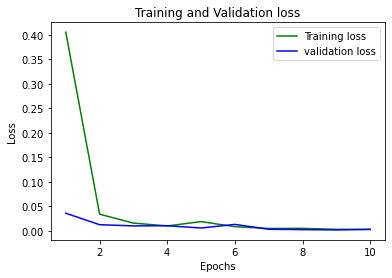

In [22]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

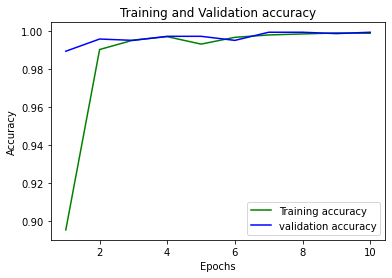

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs,accuracy, 'g', label='Training accuracy')
plt.plot(epochs,val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [25]:
y_pred=model.predict(X_test,verbose=0)
y_predd=np.ndarray.round(y_pred)
print(y_predd)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [26]:
y_predval=[]
for i in y_predd:
    if(i[0]>i[1]):
        y_predval.append(0)
    else:
        y_predval.append(1)

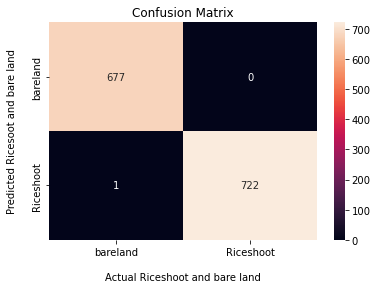

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predval)
f = sns.heatmap(cm, annot=True, fmt='d')
f.set_title("Confusion Matrix")
f.xaxis.set_ticklabels(['bareland','Riceshoot'])
f.yaxis.set_ticklabels(['bareland','Riceshoot'])
plt.xlabel("Actual Riceshoot and bare land",labelpad=15)
plt.ylabel("Predicted Ricesoot and bare land",labelpad=15)
plt.show()

In [28]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img("test_land.tif",target_size=(48,48))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
arr=model.predict(test_image)
print(arr)
arr=np.ndarray.tolist(arr)
t=arr[0].index(max(arr[0]))
print("Predicted Stage : ",Categories[t])

1/1 [==============================] - 0s 122ms/step
[[4.976456e-07 9.999995e-01]]
Predicted Stage :  riceshoot


In [29]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img("test_img.tif",target_size=(48,48))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
arr=model.predict(test_image)
print(arr)
arr=np.ndarray.tolist(arr)
t=arr[0].index(max(arr[0]))
print("Predicted Stage : ",Categories[t])

1/1 [==============================] - 0s 28ms/step
[[1.4849415e-13 1.0000000e+00]]
Predicted Stage :  riceshoot


In [30]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img("land.tif",target_size=(48,48))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
arr=model.predict(test_image)
print(arr)
arr=np.ndarray.tolist(arr)
t=arr[0].index(max(arr[0]))
print("Predicted Stage : ",Categories[t])

1/1 [==============================] - 0s 26ms/step
[[0.00621012 0.99378985]]
Predicted Stage :  riceshoot


In [31]:
import numpy
import sklearn.metrics
import numpy
import sklearn.metrics

r = sklearn.metrics.confusion_matrix(y_test, y_predval)
acc = (r[0][0] + r[1][1]) / numpy.sum(r)
print("Accuracy :")
print('%.3f' %acc)
precision = sklearn.metrics.precision_score(y_test, y_predval)
print("Precision :")
print('%.5f' %precision)
print("Recall :")
recall = sklearn.metrics.recall_score(y_test, y_predval)
print('%.5f' %recall)
print("F1 Score :")
f1 = sklearn.metrics.f1_score(y_test, y_predval,average='micro')
print('%.3f' %f1)

Accuracy :
0.999
Precision :
1.00000
Recall :
0.99862
F1 Score :
0.999


In [32]:
from sklearn.metrics import classification_report
target_names = ['Bareland', 'Riceshoot']
print(classification_report(y_test, y_predval, target_names=target_names))

              precision    recall  f1-score   support

    Bareland       1.00      1.00      1.00       677
   Riceshoot       1.00      1.00      1.00       723

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [33]:
import pickle


In [38]:
filename='cnnmodel.h5'
model.save(filename)